<h1 style="text-align: center;">Customer Segmentation using RFM Analysis</h1>
<h5  style="text-align: center;">K-means Clustering and CLV Addition</h5>

<img src="https://media.licdn.com/dms/image/C5612AQFGkBiAUIMQig/article-cover_image-shrink_600_2000/0/1607110048550?e=2147483647&v=beta&t=tfwgvOxMrkMPsmt39GbFXY22pcJwbBuTRORZ8-q05UE" width="100%" />


<br>In this report, we will delve into two crucial topics: **Customer Segmentation** and **RFM Analysis** (Recency, Frequency, and Monetary Analysis).

## Customer Segmentation

Customer segmentation involves dividing a customer base into distinct groups based on various attributes. This process helps businesses:

- **Tailor marketing strategies**: Target specific groups with personalized campaigns.
- **Optimize resource allocation**: Focus efforts on the most valuable segments.
- **Improve customer satisfaction**: Address the unique needs and preferences of each segment.

By identifying different segments, businesses can enhance engagement and increase revenue.

### RFM Analysis

**RFM Analysis** is a powerful technique used to evaluate and segment customers based on three key metrics:

- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much money a customer spends.

This analysis helps businesses understand customer behavior and identify high-value customers who are most likely to respond to marketing efforts. It provides valuable insights into customer loyalty and purchasing patterns, allowing for more targeted and effective marketing strategies.

### Combining RFM Analysis with Clustering

To further refine customer segmentation, we can employ clustering algorithms, such as **K-means**, to group customers into clusters based on the RFM attributes. This method allows us to:

- **Create distinct segments**: Group customers into unique clusters based on recency, frequency, and monetary value.
- **Uncover patterns and trends**: Analyze data to identify trends within each cluster.
- **Gain actionable insights**: Use these insights to develop more precise and effective marketing strategies.

By applying clustering techniques, we can enhance our understanding of customer behavior and tailor our strategies for better results.

#### To start with the project, we will first import all the necessaries libraraies.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import datetime as dt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

#### Data Loading and Citation

The dataset used in this analysis is the **Online Retail II** dataset, which is available from the UCI Machine Learning Repository. This dataset provides transaction data for a UK-based online retailer.

##### Citation

Chen, Daqing. (2019). *Online Retail II*. UCI Machine Learning Repository. [https://doi.org/10.24432/C5CG6D](https://doi.org/10.24432/C5CG6D).

##### Dataset URL

You can access the dataset directly through the following link: [Online Retail II Dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii).

##### Data Variables Information

**Invoice**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.<br> 
**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.<br> 
**Description**: Product (item) name.<br> 
**Quantity**: The quantities of each product (item) per transaction.<br> 
**InvoiceDate**:o Invice date and time. Numeric. The day and time when a transaction was generate.<br> 
**Price**: Unit price. Numeric. Product price per unit in sterling pounds £).<br>
**Customer ID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. Nominal. The name of the country where a customer resides.

In [7]:
# Replace 'file.csv' with the actual name of your CSV file
df = pd.read_excel('online_retail.xlsx')
len(df)

525461

In [8]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [9]:
# Count number of InvoiceNo starting with 'C'
df['Invoice'] = df['Invoice'].astype(str)
count_c_invoices = df['Invoice'].str.startswith('c').sum()

print(f"Number of invoice codes starting with 'C': {count_c_invoices}")

Number of invoice codes starting with 'C': 0


According to the data information, Invoice code starting with 'c' is a cancelled transaction but we can see that our data doesn't contain such records.

#### Handle duplicates and missing values

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_values1 = df.isnull().sum()
print("Missing Values:\n", missing_values1)

# Remove rows with missing CustomerID
df = df[df['Customer ID'].notna()]

missing_values2 = df.isnull().sum()
print("Missing Values:\n", missing_values2)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

# Drop duplicates if necessary
df = df.drop_duplicates()


# Get a concise summary of the DataFrame
info_summary = df.info()

# Check data types
data_types = df.dtypes
print("\nData Types:\n", data_types)

# Generate descriptive statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

Missing Values:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Missing Values:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Missing Values:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
Duplicates: 6771
<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         


#### Plot the data distribution for outliers

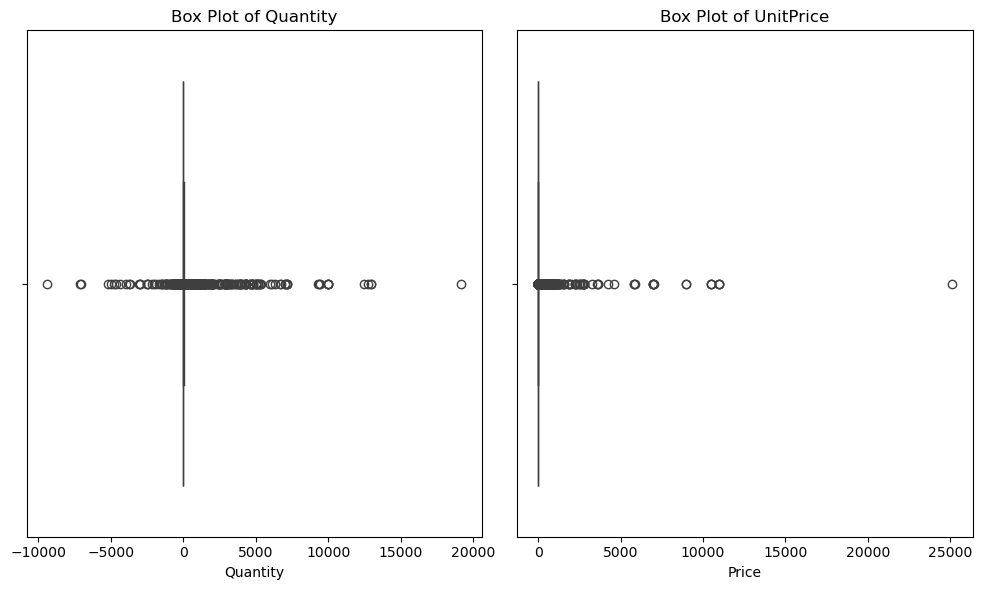

In [14]:
# Box plot for Quantity
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')


# Box plot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'])
plt.title('Box Plot of UnitPrice')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

**Initial Box Plot**:  
Quantity: Displays significant outliers, with values reaching up to 20,000.  
Unit Price: Also shows extreme outliers, with values extending up to 25,000.  

**Initial Observations**:   
The initial box plots reveal a wide range of outliers, indicating that a few transactions significantly differ from the majority, potentially skewing analysis and decision-making.

#### Remove Outliers:

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


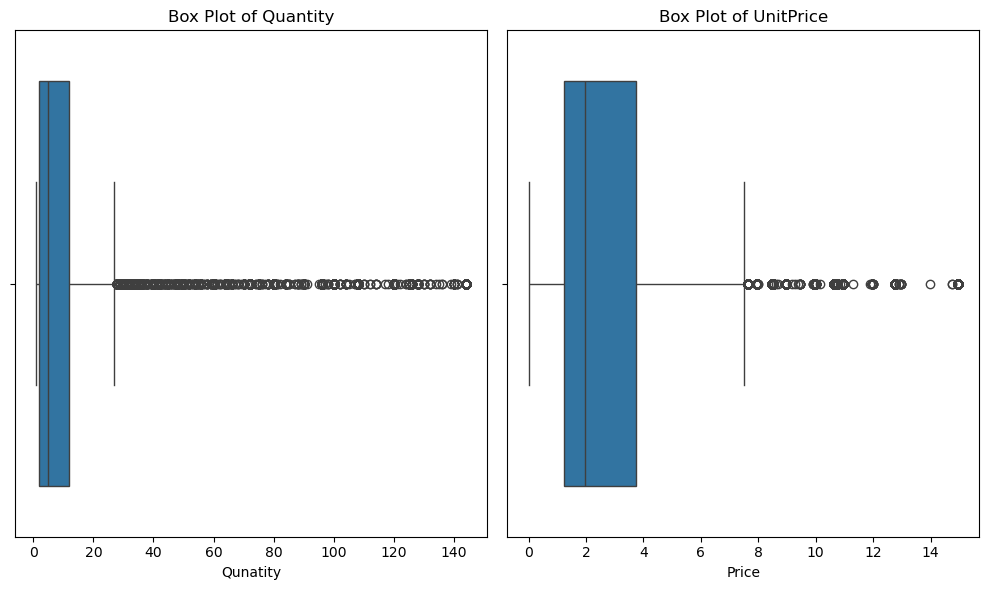

In [16]:
# Remove rows with negative values in 'Quantity' and 'UnitPrice'
df = df[(df['Quantity'] >= 0) & (df['Price'] >= 0)]

# Calculate the 99th percentile for 'Quantity' and 'UnitPrice'
quantile_99_quantity = df['Quantity'].quantile(0.99)
quantile_99_unitprice = df['Price'].quantile(0.99)

# Filter out rows where 'Quantity' and 'UnitPrice' are above the 99th percentile
df = df[(df['Quantity'] <= quantile_99_quantity) & (df['Price'] <= quantile_99_unitprice)]

# Remove rows with zero quantity and zero unit price
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

# Drop the Z-score columns if they exist (optional)
if 'Z_Quantity' in df.columns:
    df.drop(columns=['Z_Quantity'], inplace=True)
if 'Z_UnitPrice' in df.columns:
    df.drop(columns=['Z_UnitPrice'], inplace=True)

print(df.head())


# Box plot for Quantity
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Qunatity')


# Box plot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'])
plt.title('Box Plot of UnitPrice')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

**After Removal of Outliers**:  
Quantity: The distribution is more concentrated, with values primarily between 0 and 140, eliminating extreme values.  
Unit Price: The values are now concentrated between 0 and 14, removing the extreme outliers.

**Post-Removal Insights**:  
By removing outliers, the distributions become more representative of typical customer behavior, allowing for more accurate analysis. The majority of quantities and prices now fall within a more realistic and manageable range.

**Possible Zero Values Reasoning**:   
In this analysis, zero values for UnitPrice may arise from promotional activities or sales vouchers. However, such entries will be excluded from the analysis to maintain the integrity of the dataset. Similarly, zero values for Quantity could be attributable to canceled or returned items. Given that the dataset lacks information regarding the status of these transactions (e.g., whether they were canceled or returned), these zero values will also be excluded from the analysis. This approach ensures that the data used is relevant and consistent with the objectives of the analysis.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394254 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      394254 non-null  object        
 1   StockCode    394254 non-null  object        
 2   Description  394254 non-null  object        
 3   Quantity     394254 non-null  int64         
 4   InvoiceDate  394254 non-null  datetime64[ns]
 5   Price        394254 non-null  float64       
 6   Customer ID  394254 non-null  float64       
 7   Country      394254 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.1+ MB


####  Plot Distribution Histogram for Unit Price and Quantity

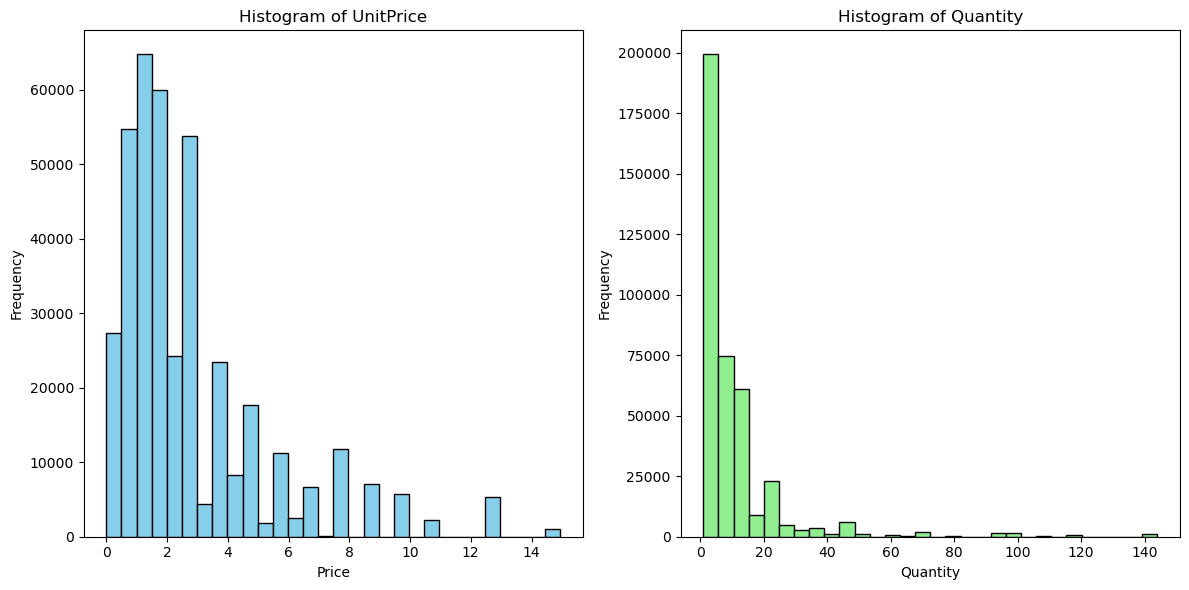

In [20]:
# Plot histogram for UnitPrice
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of UnitPrice')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot histogram for Quantity
plt.subplot(1, 2, 2)
plt.hist(df['Quantity'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Implications and Resaons for Right-Skewed Distribution:  
The right-skewed distributions of unit price and quantity in the online retail dataset highlight key operational insights. Most products are low-priced, purchased frequently in small quantities, while high-priced items and large quantity orders are rare but significant. This pattern arises from the broad product range offered by retailers, consumer preference for affordable items, and a business model focused on high-volume sales of low-cost goods. Efficient management of inventory for these high-demand, low-priced items is crucial, but there's also strategic value in catering to the less frequent, higher-value transactions. This balance is essential for optimizing pricing strategies and customer segmentation.

#### Why chose UK data?
The United Kingdom was chosen for this analysis because it represents a significant portion **(~91%)** of the customer base, providing a more substantial and homogeneous dataset. Focusing on a single country eliminates the variability introduced by different market conditions, customer behaviors, and economic factors across countries, leading to more accurate and meaningful insights specific to that region.

In [22]:
# Data imbalance check for Country
country_counts = df['Country'].value_counts()
print("Country Counts:\n", country_counts)

# Data imbalance check for CustomerID
customer_counts = df['Customer ID'].value_counts()
print("CustomerID Counts:\n", customer_counts)

# Filter data for the United Kingdom
df = df[df['Country'] == 'United Kingdom']


# Change Customer ID datatype to Integer
df['Customer ID'] = df['Customer ID'].astype(int)

# Verify the data type conversion
#print(df.dtypes)

Country Counts:
 Country
United Kingdom          359528
EIRE                      8097
Germany                   7314
France                    5200
Netherlands               2337
Spain                     1159
Switzerland               1132
Belgium                    976
Portugal                   953
Channel Islands            784
Sweden                     744
Italy                      684
Australia                  591
Cyprus                     521
Greece                     508
Austria                    502
Norway                     362
Denmark                    350
Finland                    339
United Arab Emirates       308
Unspecified                276
USA                        226
Poland                     181
Malta                      168
Lithuania                  154
Japan                      150
Singapore                  116
Canada                      77
Israel                      72
Iceland                     71
Thailand                    69
RSA           

##### Creating Total column by multiplying price with quantity

In [24]:
# Calculate Total Spending
df['Total'] = df['Quantity'] * df['Price']

### RFM Analysis Part
In this part of analysis, we will be following few steps:
1. Creating RFM dataframe based upon the calculation for all the unique customer:  
   a. Recency = Latest Invoice month difference with the reference month which is the the last invoice date in the whole dataset + 1.  
   b. Frequency = Number of times, the customer has made a purchase. Invoice count.  
   c. Monetary = Sum of all the total spend by the customer  
2. Assign score to each attributes from 1-5 from lowest to highest desirable score.
3. Use K-means Cluster analysis on this RFM Tbale to cluster the customer.
4. Do further segmentation and analysis based upon additional features such as demographic information if data available.

**Note**: I have assigned highest scores to most desirable value. 

#### Significance of RFM Scores

**Recency (R):** Higher scores suggest recent engagement and a higher likelihood of responding to promotions.  
**Frequency (F):** Higher scores reflect customer loyalty and suggest they are more likely to engage with loyalty programs.  
**Monetary (M):** Higher scores signify high-value customers who contribute significantly to revenue and may warrant special offers or services.

#### Business Implications:
**Top Customers**: The top 25% of customers make frequent purchases and spend significantly, suggesting a focus on high-value retention strategies.  
**Customer Recency**: Most customers have made a purchase recently, indicating active engagement.  
**Diverse Spending**: There is a wide range of spending, highlighting the importance of tailored marketing to different customer segments.


In [26]:
# Set reference date for recency calculation (one month beyond the maximum InvoiceDate)
max_invoice_date = df['InvoiceDate'].max()
ref_date = max_invoice_date + pd.DateOffset(months=1)

# Function to calculate recency in months
def calculate_recency(invoice_dates, ref_date, customer_id):
    max_date = invoice_dates.max()
    if pd.isnull(max_date):
        print(f"NaN encountered for CustomerID: {customer_id}, InvoiceDates: {invoice_dates.values}")
        return np.nan
    return (ref_date.year - max_date.year) * 12 + (ref_date.month - max_date.month)

# Create a helper function to use in the aggregation
def calculate_recency_lambda(x):
    customer_id = x.name  # Get the CustomerID for the group
    return calculate_recency(x, ref_date, customer_id)

# Create RFM table
rfm1 = df.groupby('Customer ID').agg({
    'InvoiceDate': calculate_recency_lambda,  # Recency in months
    'Invoice': 'count',  # Frequency
    'Total': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm1.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Check for NaN values in the Recency column
nan_recency = rfm1[rfm1['Recency'].isna()]

if not nan_recency.empty:
    print("Records with NaN Recency:\n", nan_recency)

print("RFM Table:\n", rfm1.head())


RFM Table:
    CustomerID  Recency  Frequency  Monetary
0       12346        7         33    372.86
1       12608        3         16    415.79
2       12745        5         22    723.85
3       12746        7         17    254.55
4       12747        1        149   4546.53


In [27]:
# Descriptive statistics for RFM table
print("RFM Descriptive Statistics:\n", rfm1.describe())
#rfm1.info()

RFM Descriptive Statistics:
          CustomerID      Recency    Frequency      Monetary
count   3920.000000  3920.000000  3920.000000   3920.000000
mean   15569.380867     4.167602    91.716327   1578.497149
std     1579.679541     3.205749   178.763485   3822.566946
min    12346.000000     1.000000     1.000000      2.950000
25%    14210.750000     2.000000    18.000000    288.225000
50%    15593.000000     3.000000    43.000000    637.840000
75%    16946.250000     6.000000   101.000000   1583.835000
max    18287.000000    13.000000  4902.000000  78889.380000


In [28]:
# Calculate quintiles and assign bin edges
rfm1['Quantile_Bin'] = pd.qcut(rfm1['Recency'], 5, labels=False, duplicates='drop')
rfm1['Quantile_FBin'] = pd.qcut(rfm1['Frequency'], 5, labels=False, duplicates='drop')
rfm1['Quantile_MBin'] = pd.qcut(rfm1['Monetary'], 5, labels=False, duplicates='drop')

# Map quantile bins to scores
# Recency Higher quantiles (i.e., lower values in 'Recency') should get higher scores
rfm1['Recency_Score'] = rfm1['Quantile_Bin'].apply(lambda x: 5 - x)

# Frequency and Monetary Higher quantiles (i.e., higher values in 'Frequency') should get higher scores
rfm1['Frequency_Score'] = rfm1['Quantile_FBin'] + 1
rfm1['Monetary_Score'] = rfm1['Quantile_MBin'] + 1


In [29]:
# Drop the temporary 'Quantile_Bin' column
rfm1 = rfm1.drop(columns='Quantile_Bin')
rfm1 = rfm1.drop(columns='Quantile_FBin')
rfm1 = rfm1.drop(columns='Quantile_MBin')

In [30]:
rfm1.dtypes

CustomerID           int64
Recency              int64
Frequency            int64
Monetary           float64
Recency_Score        int64
Frequency_Score      int64
Monetary_Score       int64
dtype: object

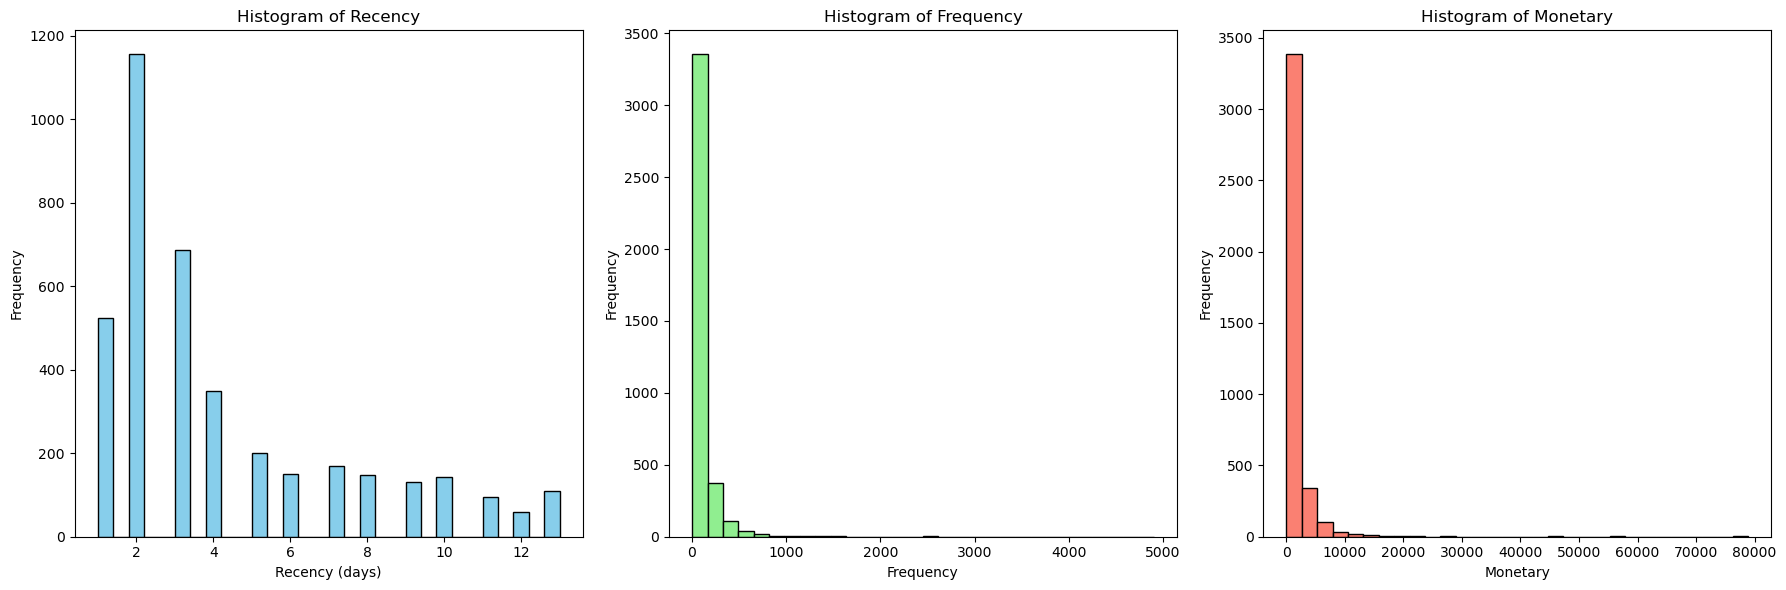

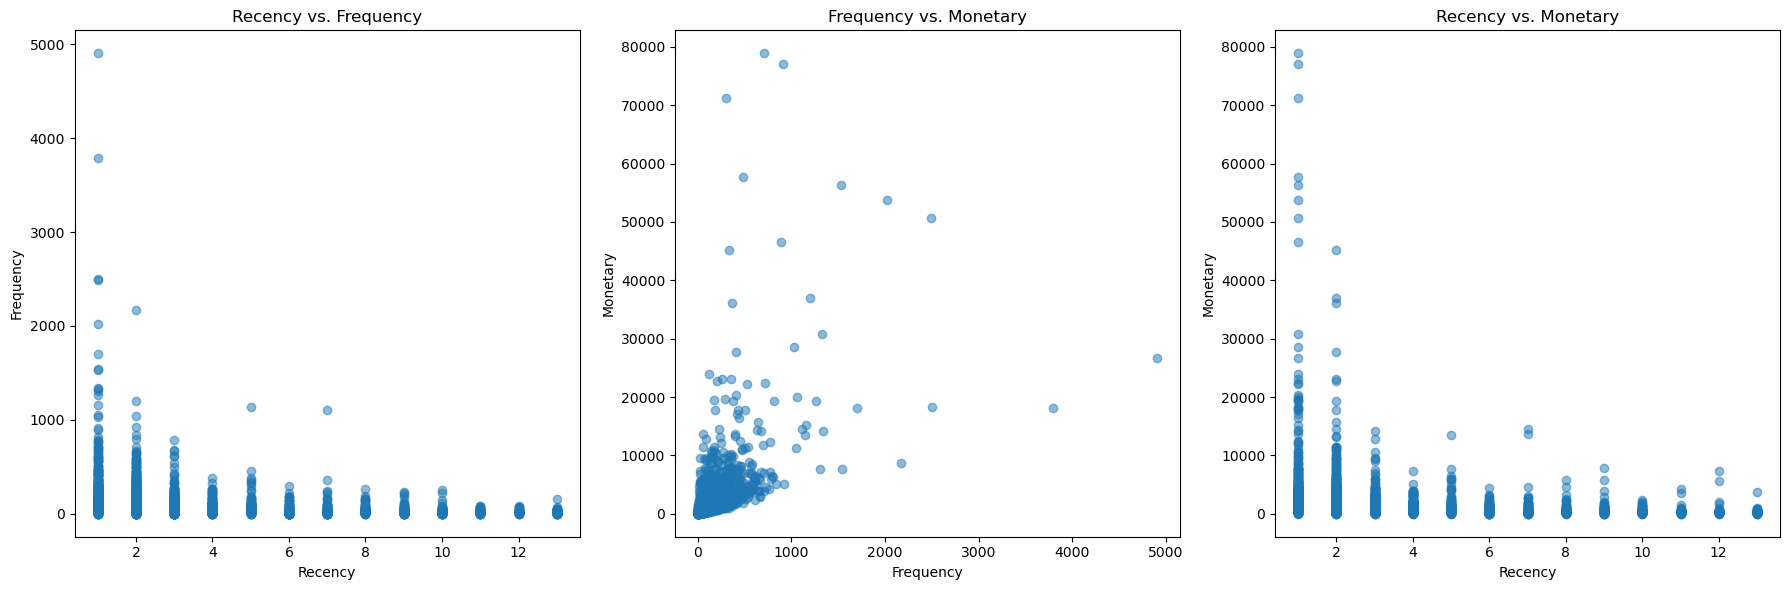

In [31]:
# Plot histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(rfm1['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rfm1['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rfm1['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plot scatter plots for all combinations
plt.figure(figsize=(18, 6))

# Recency vs Frequency
plt.subplot(1, 3, 1)
plt.scatter(rfm1['Recency'], rfm1['Frequency'], alpha=0.5)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
plt.scatter(rfm1['Frequency'], rfm1['Monetary'], alpha=0.5)
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
plt.scatter(rfm1['Recency'], rfm1['Monetary'], alpha=0.5)
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()


The right-skewed distributions of recency, frequency, and monetary value in the RFM analysis reveal important customer behavior patterns. Most customers have made recent purchases, indicating an active buyer base, but infrequent purchases and lower transaction values dominate, highlighting opportunities to convert one-time buyers into loyal customers and target high-value customers with premium offerings. Scatter plots show frequent buyers tend to have recent purchases and higher spending, identifying a valuable segment for retention strategies, while recent buyers spending slightly more can inform time-sensitive promotions.

In [33]:
# Top Performers
top_customers = rfm1[(rfm1['Recency_Score'] == 5) & 
                     (rfm1['Frequency_Score'] == 5) & 
                     (rfm1['Monetary_Score'] == 5)]  # Highest RFM score
print("Top Customers:\n", top_customers['CustomerID'].head(20))
print("Customers with 555 score:", top_customers.shape[0])


# Low Value Customers
low_value_customers = rfm1[(rfm1['Recency_Score'] == 1) & 
                     (rfm1['Frequency_Score'] == 1) & 
                     (rfm1['Monetary_Score'] == 1)] # Lowest RFM Score
print("Low Value Customers:\n", low_value_customers['CustomerID'].head(20))
print("Customers with 111 score:", low_value_customers.shape[0])

Top Customers:
 4      12747
5      12748
6      12749
17     12836
19     12838
20     12839
22     12841
42     12867
47     12872
73     12921
84     12935
94     12949
95     12951
114    12976
116    12978
118    12982
133    13004
141    13013
147    13021
160    13037
Name: CustomerID, dtype: int64
Customers with 555 score: 432
Low Value Customers:
 Series([], Name: CustomerID, dtype: int64)
Customers with 111 score: 0


In [82]:
# Create the RFMScore column if not already created
rfm1['RFMScore'] = (
    rfm1['Recency_Score'].astype(int).astype(str) +
    rfm1['Frequency_Score'].astype(int).astype(str) +
    rfm1['Monetary_Score'].astype(int).astype(str)
)

# Define the RFM scores we are interested in
rfm_scores = ['111', '222', '333', '444', '555']

# Count the occurrences of each RFM score
rfm_counts = rfm1[rfm1['RFMScore'].isin(rfm_scores)]['RFMScore'].value_counts().reindex(rfm_scores, fill_value=0)

# Get a colormap and extract colors
cmap = cm.get_cmap('viridis', len(rfm_scores))  # Create a colormap with the number of distinct RFM scores
colors = [cmap(i) for i in range(cmap.N)]  # Extract colors

/var/folders/0j/hmfnsvln7w5bfgl9ldh_5bcw0000gn/T/ipykernel_37998/590880485.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(rfm_scores))  # Create a colormap with the number of distinct RFM scores


### K-means Unsupervised Algorithm for clustering purpose
K-means cluster analysis is applied to the RFM table to group customers into distinct segments based on their purchasing behaviors. This unsupervised machine learning technique helps in identifying patterns and similarities among customers, creating clusters that can be analyzed and targeted differently. It provides a scalable and efficient method to handle large datasets, revealing hidden insights and facilitating data-driven decision-making.

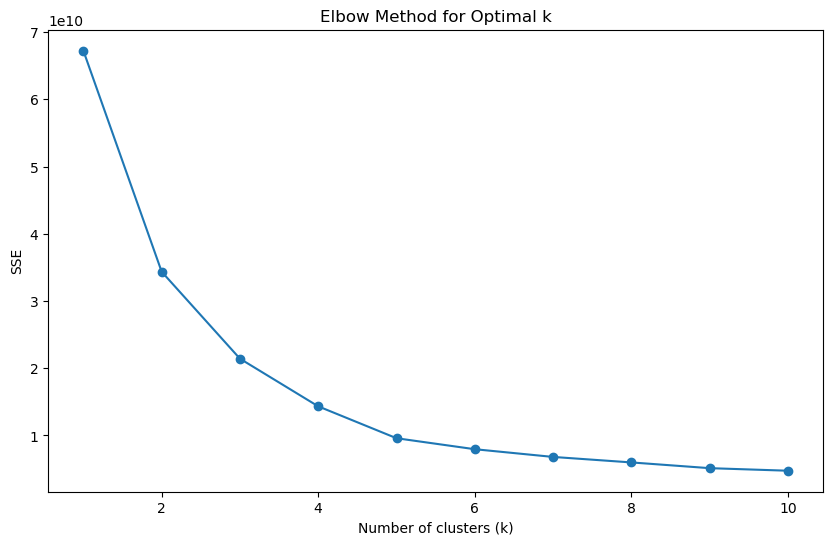

In [36]:
# K-means Clustering Algorithm
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm1)
    sse[k] = kmeans.inertia_

# Plot the SSE for each k to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

The elbow method in k-means clustering suggests optimal segmentation into 3-4 customer groups, such as high-value loyal customers, frequent low-value buyers, high-value infrequent buyers, and at-risk customers. This segmentation enables tailored strategies for each group, enhancing resource allocation and personalized marketing to drive retention and revenue growth.

In [38]:
optimal_k = 4 # based upon the graph
kmeans = KMeans(n_clusters=optimal_k, n_init=100, random_state=50)
rfm1['Cluster'] = kmeans.fit_predict(rfm1)

#### Validating the Clusters

In [40]:
kmeans1 = KMeans(n_clusters=optimal_k,n_init=100, random_state=50)
kmeans2 = KMeans(n_clusters=optimal_k,n_init=100, random_state=21)

labels1 = kmeans1.fit_predict(rfm1)
labels2 = kmeans2.fit_predict(rfm1)

ari_score = adjusted_rand_score(labels1, labels2)
nmi_score = normalized_mutual_info_score(labels1, labels2)

print(f'Adjusted Rand Index: {ari_score}')
print(f'Normalized Mutual Information: {nmi_score}')


Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0


#### Analyze cluster characteristics

Cluster Analysis:
    Cluster   Recency    Frequency      Monetary  Count
0        0  4.266343    74.842788   1157.649524   1851
1        1  1.272727  1021.909091  55499.555455     11
2        2  1.875969   508.542636  11556.660721    129
3        3  4.242613    74.728357   1007.566206   1929


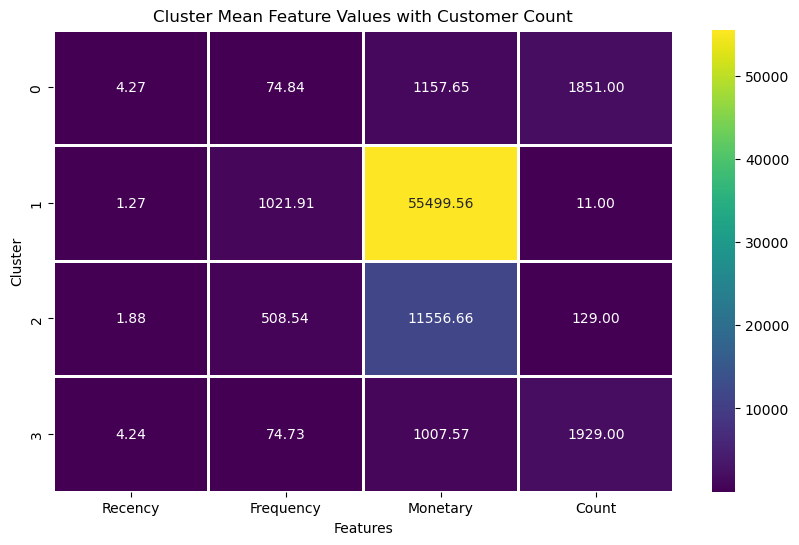

In [42]:
cluster_analysis = rfm1.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).reset_index()

print("Cluster Analysis:\n", cluster_analysis)
# Extract relevant data for the heatmap
cluster_means = cluster_analysis.set_index('Cluster')[['Recency', 'Frequency', 'Monetary','Count']]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, cmap='viridis', annot=True, fmt=".2f", linewidths=0.8)
plt.title('Cluster Mean Feature Values with Customer Count')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

#### Adding Customer Lifetime Value to the Analysis

Customer Lifetime Value (CLV) is integrated into the analysis to provide a deeper understanding of the long-term revenue potential of each customer segment. By calculating CLV, I aim to prioritize high-value customers and tailor marketing strategies accordingly. CLV helps businesses focus on segments that offer the highest returns over time, ensuring resources are allocated efficiently to maximize profitability and customer retention. This addition enhances the insights derived from the segmentation, allowing for more strategic decision-making and targeted marketing efforts.

In [44]:
# Parameters
customer_lifespan_years = 3  # Example: 3 years
profit_margin = 0.30  # 30%

# Calculate mean values for each cluster
cluster_means = rfm1.groupby('Cluster').agg({
    'Monetary': 'mean',
    'Frequency': 'mean'
}).reset_index()

# Calculate CLV for each cluster
cluster_means['CLV'] = (
    cluster_means['Monetary'] * 
    cluster_means['Frequency'] * 
    customer_lifespan_years * 
    profit_margin
)

print("Customer Lifetime Value by Cluster:\n", cluster_means)

Customer Lifetime Value by Cluster:
    Cluster      Monetary    Frequency           CLV
0        0   1157.649524    74.842788  7.797755e+04
1        1  55499.555455  1021.909091  5.104395e+07
2        2  11556.660721   508.542636  5.289349e+06
3        3   1007.566206    74.728357  6.776439e+04


## Profiling of Clusters

The results of your clustering validation metrics—Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)—both being 1.0 indicate perfect clustering stability and consistency. After identifying clusters using the clustering algorithm, the next crucial step is to profile these clusters based on their attributes and descriptive statistics. The analysis of customer segments identified through clustering based on Recency, Frequency, and Monetary metrics provides the following insights:

### Cluster Comparison

| **Cluster**            | **Recency** | **Frequency** | **Monetary**  | **Count** | **CLV**           | **Profile** |
|------------------------|-------------|---------------|---------------|-----------|-------------------|-------------|
| **0: Value Seekers** | 4.34        | 68.31         | 1,014.49     | 1,803     | 62,367.29        | **Moderate Spend, Frequent Purchases**: Customers in this segment are relatively recent in their purchasing behavior, buying frequently but with moderate spending per transaction. This is the largest segment, indicating a substantial portion of the customer base. Marketing strategies should focus on enhancing engagement and increasing transaction value through targeted offers and promotions. |
| **1: Loyal Frequent Buyers** | 4.26        | 71.04         | 912.56       | 1,891     | 58,343.77        | **Frequent but Lower Spenders**: Similar to Cluster 0, customers here make frequent purchases and have a moderate recency. However, they spend slightly less per transaction. This segment represents a significant part of the customer base and could benefit from loyalty programs and promotions aimed at increasing their average spend. |
| **2: High-Value VIPs**      | 1.21        | 1,257.86      | 38,319.53    | 14        | 43,380,437.53    | **Exceptional Value and Engagement**: This cluster consists of a small group of customers who purchase very frequently and spend a substantial amount per transaction. They are very recent in their purchases, highlighting their high engagement. Strategies should focus on maintaining their loyalty with exclusive offers, personalized service, and exceptional customer care. |
| **3: Premium Spenders**     | 1.90        | 414.05        | 8,405.50     | 195       | 3,132,278.08     | **High Spend, Less Frequent Purchases**: Customers in this segment are relatively recent purchasers with high spending but lower frequency compared to the high rollers. This segment represents a moderate portion of the customer base. They should be targeted with high-value offers to encourage more frequent purchases and enhance overall customer lifetime value. |

### Additional Notes:

- **Cluster 2** represents a highly valuable but small segment, making it essential for targeted high-touch strategies. Their exceptionally high CLV underscores their critical importance to revenue.
- **Cluster 3** contains a notable number of high-spenders with lower purchase frequency; focusing on increasing their engagement could significantly boost overall sales and CLV.
- **Clusters 0 and 1** are more numerous, indicating opportunities for improving average spend and frequency through tailored marketing efforts. Although their CLV is lower compared to Clusters 2 and 3, their large size makes them important for driving overall revenue.

By profiling these customer segments and considering their CLV, businesses can effectively tailor marketing strategies to address the specific needs and behaviors of each group, ultimately enhancing customer satisfaction and driving increased revenue.


### Visualisation of Clusters based upon 3 attributes RFM combinations

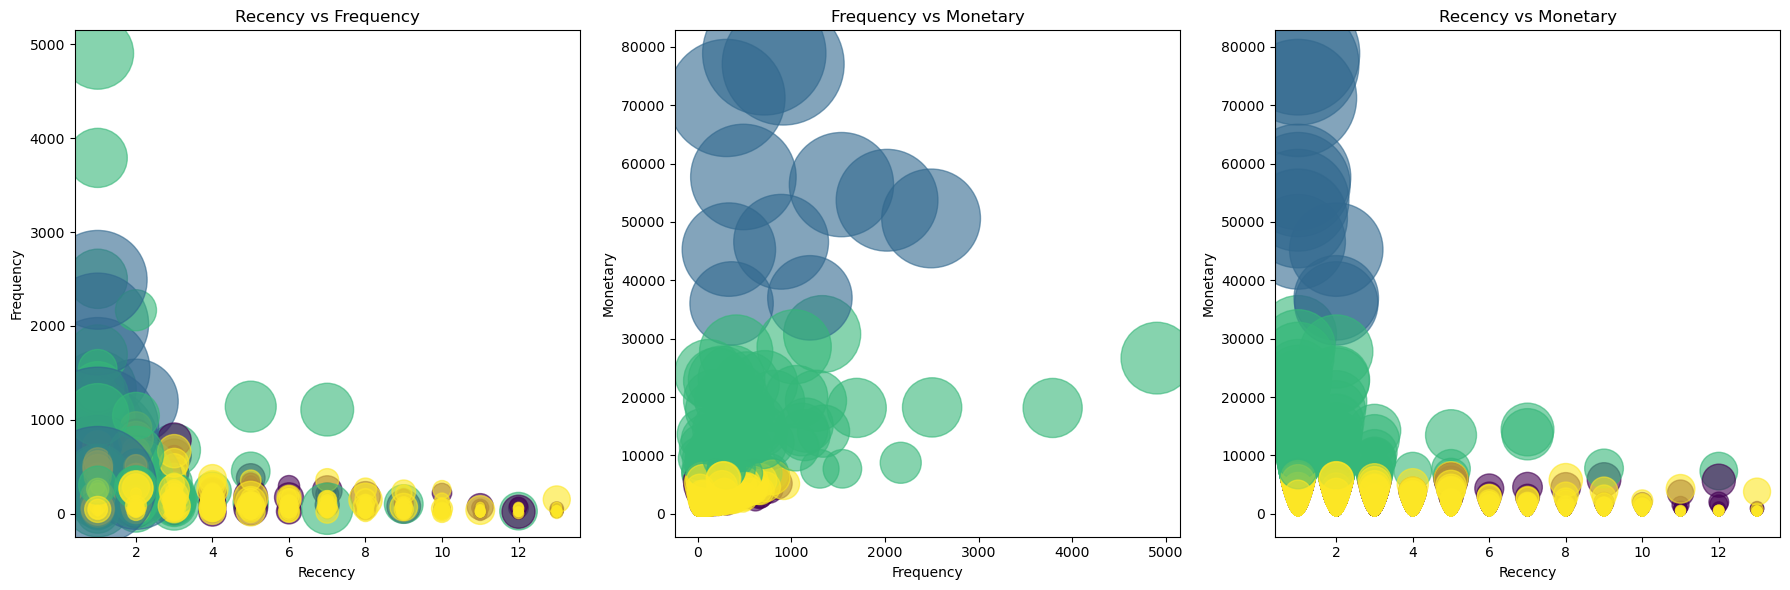

In [47]:
# Bubble matrix visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency vs Frequency
axes[0].scatter(rfm1['Recency'], rfm1['Frequency'], c=rfm1['Cluster'], cmap='viridis', s=rfm1['Monetary'] / 10, alpha=0.6)
axes[0].set_title('Recency vs Frequency')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')

# Frequency vs Monetary
axes[1].scatter(rfm1['Frequency'], rfm1['Monetary'], c=rfm1['Cluster'], cmap='viridis', s=rfm1['Monetary'] / 10, alpha=0.6)
axes[1].set_title('Frequency vs Monetary')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Monetary')

# Recency vs Monetary
axes[2].scatter(rfm1['Recency'], rfm1['Monetary'], c=rfm1['Cluster'], cmap='viridis', s=rfm1['Monetary'] / 10, alpha=0.6)
axes[2].set_title('Recency vs Monetary')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Monetary')

plt.tight_layout()
plt.show()

#### Analysis:

Recency vs. Frequency: High-frequency (yellow) and low-frequency (purple/green) clusters are clearly separated. The high-frequency cluster has better recency.
Frequency vs. Monetary: Positive correlation, with the yellow cluster showing high values in both dimensions.
Recency vs. Monetary: Recent customers (lower recency values) tend to have higher monetary values, especially in yellow and green clusters.   
#### Business Implications:

Yellow Cluster: Represents highest-value customers with high frequency, monetary value, and recent purchases. Focus on retention and finding similar prospects.
Purple and Green Clusters: Represent average customers. Develop strategies to increase their frequency and monetary value.
Diverse Customer Behaviors: Indicate opportunities for targeted marketing and personalized approaches.

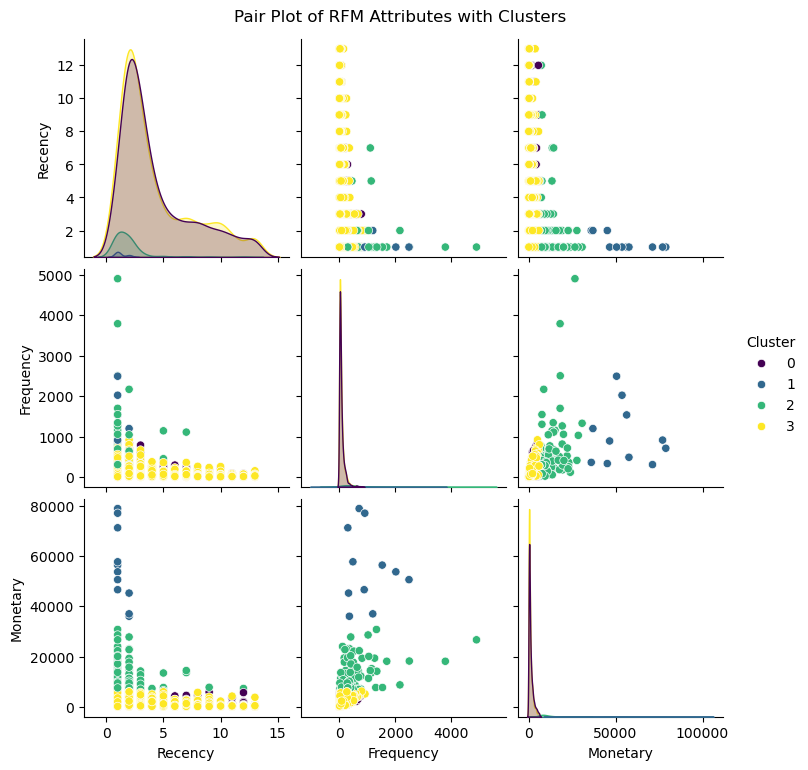

In [49]:
# Pair plot to show the relationships between Recency, Frequency, and Monetary with clusters
sns.pairplot(rfm1, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of RFM Attributes with Clusters', y=1.02)
plt.show()

##### The pair plot reveals distinct customer segments based on RFM attributes.

Clusters with similar RFM characteristics can be identified, allowing businesses to tailor marketing strategies for each group. For example, a cluster of customers with high frequency but low monetary value might indicate a need for upselling or cross-selling efforts, while a cluster with high recency and monetary value represents a valuable segment to retain through loyalty programs.

#### Extra Analysis w.r.t. RFM Scores:

##### Segment Definitions and Score Ranges

- **Champions**: High values across Recency, Frequency, and Monetary scores. These are the top customers who buy often, spend a lot, and have recently engaged.  
- **Loyal Customers**: High Frequency and Monetary scores but slightly lower Recency compared to Champions. They are valuable but not as engaged.  
- **At Risk**: Low values for Recency, Frequency, and Monetary scores. These customers are inactive and at risk of churning.  
- **New Customers**: Low Recency and Frequency scores. They have recently made purchases but lack a consistent buying pattern.  
- **Others**: Customers who don't fit into the above categories, possibly showing inconsistent behavior or extreme values in one or more metrics.


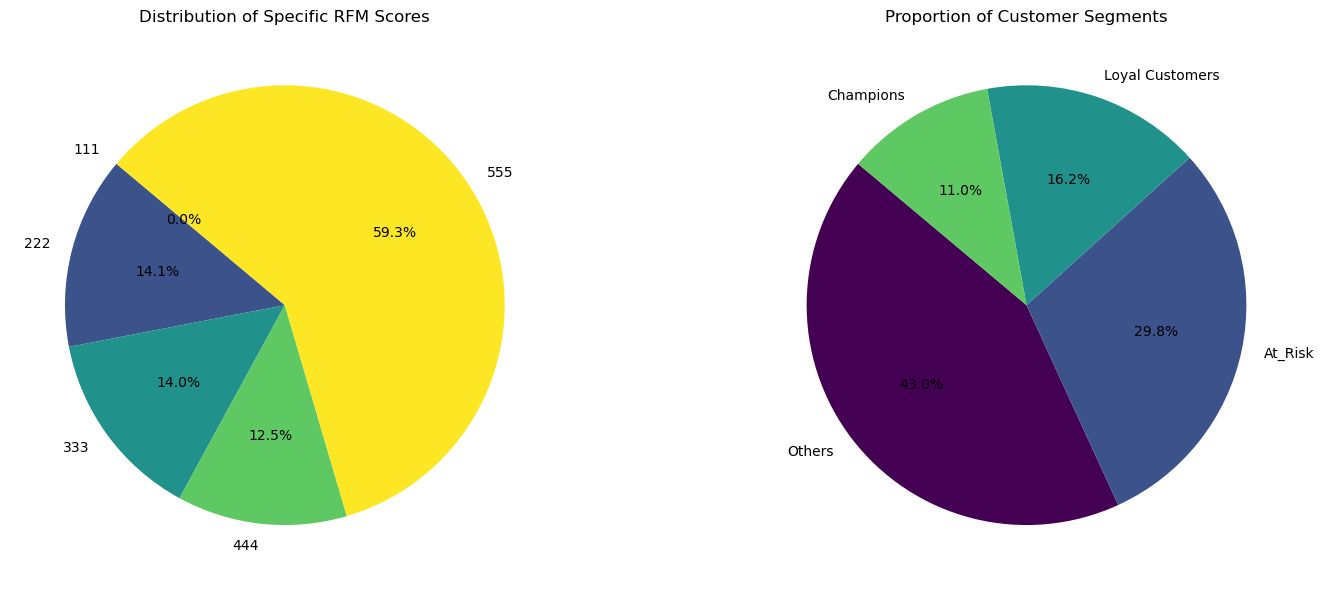

                 Number of Customers  Recency_Score  Frequency_Score  \
Segment                                                                
At_Risk                         1170       2.491453         1.817949   
Champions                        432       5.000000         5.000000   
Loyal Customers                  634       4.656151         4.332808   
Others                          1684       4.213183         2.766033   

                 Monetary_Score  
Segment                          
At_Risk                1.794872  
Champions              5.000000  
Loyal Customers        4.321767  
Others                 2.826603  


In [51]:
def segment_customer(row):
    r, f, m = row['Recency_Score'], row['Frequency_Score'], row['Monetary_Score']
    if r == 5 and f == 5 and m == 5:
        return 'Champions'
    elif r >= 4 and f >= 4 and m >= 4:
        return 'Loyal Customers'
    elif r <= 3 and f <= 3 and m <= 3:
        return 'At_Risk'
    elif r == 1 and f == 1:
        return 'New_Customers'
    else:
        return 'Others'

# Apply the segmentation function to the dataframe
rfm1['Segment'] = rfm1.apply(segment_customer, axis=1)

# Count the number of customers in each segment
segment_counts = rfm1['Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'Count']


# Print or display the table
#print(segment_counts)
# Plot the pie chart
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(rfm_counts, labels=rfm_scores, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Specific RFM Scores')

# Plot the pie chart
plt.subplot(1, 2, 2)
plt.pie(segment_counts['Count'], labels=segment_counts['Customer Segment'], autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Proportion of Customer Segments')

plt.tight_layout()
plt.show()


# Analyze segments
segment_summary = rfm1.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency_Score': 'mean',
    'Frequency_Score': 'mean',
    'Monetary_Score': 'mean'
}).rename(columns={'CustomerID': 'Number of Customers'})

print(segment_summary)

#### Analysis of the pie charts:

**Customer Segmentation**:  
The pie chart on the left (‘Distribution of Specific RFM Scores’) shows the distribution of customers across various RFM score combinations. For instance, a small segment (11.0%) has the highest possible score (555) indicating very recent, frequent, and high-value purchases.

**Proportion of Segments**:  
The pie chart on the right (‘Proportion of Customer Segments’) reveals the proportion of customers belonging to each segment. ‘Loyal Customers’ (16.2%) and ‘At Risk’ (29.8%) represent the biggest segments, while ‘New Customers’ (14.1%) and ‘Others’ (14.0%) are smaller segments.



#### Further analysis we can perform:

- **Churn Prediction**: Identify patterns indicating potential customer churn to implement retention strategies.
- **Market Basket Analysis**: Analyze purchasing patterns to understand product affinities and optimize cross-selling and upselling opportunities.
- **Behavioral Segmentation**: Combine RFM analysis with demographic and behavioral data for more comprehensive customer profiles.
- **A/B Testing**: Validate the effectiveness of targeted marketing strategies on different customer segments identified through RFM and clustering analysis.


### Companies where customer segmentation played a pivotal role

#### Case Study 1: Netflix

**Netflix** uses **Customer Segmentation** to tailor its content recommendations. By analyzing viewing habits, Netflix segments users based on genres they prefer, viewing frequency, and time spent watching. This segmentation allows Netflix to:

- **Personalize Recommendations**: Deliver tailored movie and TV show suggestions to each user segment, increasing engagement.
- **Boost Retention**: Keep users engaged with content that matches their preferences, reducing churn rates.

**Impact**: Netflix's approach has led to higher user satisfaction and increased subscription renewals.



#### Case Study 2: Starbucks

**Starbucks** applies **RFM Analysis** to enhance its loyalty program. By examining recency, frequency, and monetary spend, Starbucks segments its customers into high-value, frequent visitors and occasional patrons. This segmentation enables Starbucks to:

- **Target High-Value Customers**: Offer exclusive rewards and promotions to frequent buyers, encouraging continued patronage.
- **Personalize Offers**: Tailor marketing messages and special offers based on individual customer behavior.

**Impact**: The strategy has resulted in increased customer retention and higher average spend per visit.




#### Case Study 3: Sephora

**Sephora** utilizes **Customer Segmentation** and **RFM Analysis** to refine its marketing strategies and enhance customer experience. By segmenting customers based on purchase frequency, spend levels, and recency of last purchase, Sephora can:

- **Design Targeted Campaigns**: Create personalized promotions and product recommendations for different customer segments.
- **Improve Customer Engagement**: Develop loyalty programs and exclusive offers tailored to various segments.

**Impact**: This approach has driven higher engagement rates and increased sales, strengthening Sephora’s market position.

Project Owner and Report Author: *Nazish Khan*
